In [17]:
from crear_dataset import *
from funcions_net import *
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import pandas as pd
from preprocessing import *

In [18]:
df, meta = pyreadstat.read_sav("CEJFEAjut2015Updated.sav")

df_variables = pd.read_csv("variables.csv", sep=';')

dict = create_dict(meta)

print("Creem diccionari")

Creem diccionari


In [19]:
df = create_dataset(df, dict)

c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\crear_dataset.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[dict[num]] = np.where(df[dict[num]] == 5, 1, 0)
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\crear_dataset.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[dict[num]] = np.where(df[dict[num]] == 5, 1, 0)


In [20]:
print("Mirem quants nans tenim a cada columna")
netejat,df = neteja_na_columns(df, llindar=0.6)

df = omple_nans(df)

print("Columnes netejades")
## fem label encoding de les columnes categòriques
df = label_encoding(df)


Mirem quants nans tenim a cada columna
Columnes netejades


c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\preprocessing.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net[col].fillna(mitjana, inplace=True)
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\preprocessing.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [21]:
num_columnes = df.shape[1]
print("Hem netejat les columnes i hem fet label encoding")
print("Tenim ", num_columnes, " columnes")

Hem netejat les columnes i hem fet label encoding
Tenim  65  columnes


In [22]:
## mirem la correlació de les columnes amb la variable objectiu

correlacio = df.corr()

correlacio = abs(correlacio['temps_fins_reincidencia1a'])

correlacio = correlacio.sort_values(ascending=False)

print(correlacio[0:25])

temps_fins_reincidencia1a    1.000000
EdatAD                       0.496726
SAVRYSoc                     0.421711
Total_Del                    0.367928
t_internamentCape            0.354630
SAVRYTot                     0.352350
CAPEe_PT                     0.318598
SAVRYInd                     0.316342
Pri_Exp                      0.290628
YPI_RE                       0.281535
YSRTotProb                   0.248039
YSRGrupExtCAPEe              0.236594
CAPEe_PT_3items              0.235529
TRFMGrupExtCAPEe             0.232721
ICUJ_CA                      0.231664
TRFMGrupDSMCDConsCAPEe       0.223571
YSRGrupDSMCDConsCAPEe        0.206910
PCLj_PT                      0.205329
VASTDir                      0.196074
NSancGreu                    0.194125
TRFTTotProb                  0.185848
SD3Narc                      0.184098
Niv_Esc                      0.180535
CAPEo_PT                     0.180302
TRFTGrupExtCAPEe             0.178311
Name: temps_fins_reincidencia1a, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='temps_fins_reincidencia1a'), df['temps_fins_reincidencia1a'], test_size=0.2)


In [24]:
from sklearn.preprocessing import StandardScaler

## normalitzem les dades
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [25]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

## treim els coeficients que són 0
coef = pd.Series(lasso.coef_, index = df.drop(columns='temps_fins_reincidencia1a').columns)
print("Hem fet el model Lasso")
print("Hem trobat ", sum(coef == 0), " coeficients nuls")
print("Hem trobat ", sum(coef != 0), " coeficients no nuls")
## fem print dels que no són 0
print("Els coeficients no nuls són:")
print(coef[coef != 0])
## fem print dels coeficients nuls
print("Els coeficients nuls són:")
print(coef[coef == 0])



Hem fet el model Lasso
Hem trobat  26  coeficients nuls
Hem trobat  38  coeficients no nuls
Els coeficients no nuls són:
EdatAD                    240.418538
Niv_Esc                    29.066360
NSancMGreu                  1.370320
Total_Del                -137.730013
Pri_Exp                   -51.810208
PCLe20                    149.889558
PCLe_PT                     5.162656
PCLx_PT                   105.834108
PCLj_PT                  -131.820781
PCLYVMPT                   68.441334
CAPEe_PT                 -172.281000
DDTotal                    81.837141
YSRTotProb                -80.174113
VASTDir                   -22.892323
SD3Mach                   -42.826069
SD3Psyc                   -20.388852
SD3Narc                  -121.645867
SAVRYSoc                   -9.421499
SAVRYInd                 -105.549945
SAVRYTot                  -61.335555
TriPMBold                -109.375998
ICUJ_CA                   -84.883989
CCA_PT                     85.536071
YPI_DC                   -16

In [ ]:
# Definim un llindar per als coeficients
llindar = 0.1  # Pots ajustar aquest valor segons les teves necessitats

# Filtrar els coeficients que són significatius (absolut > llindar)
coef_significatius = coef[abs(coef) > llindar]

print("Els coeficients significatius són:")

# Eliminar les columnes amb coeficients baixos o nuls del DataFrame original
X_train = pd.DataFrame(X_train, columns=df.drop(columns='temps_fins_reincidencia1a').columns)
X_train_filtrat = X_train[coef_significatius.index]

print("Columnes restants després del filtratge:")
    

Els coeficients significatius són:
Columnes restants després del filtratge:


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## fem grid search per trobar els millors hiperparàmetres

param_grid = {
    'n_estimators': [20,50,100],
    'max_depth': [120,180,250],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train_filtrat, y_train)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(np.mean(grid_search.cv_results_['mean_test_score'] * -1))  # Multipliquem per -1 per obtenir el MSE positiu

best_model = grid_search.best_estimator_


Millor paràmetre: {'max_depth': 120, 'n_estimators': 100}
Millor precisió: 133288.66595866665
Mitjana dels resultats de test per cada combinació:
148017.64782703703



--- AVALUACIÓ FINAL EN TEST ---
MSE (Test): 362131.5112


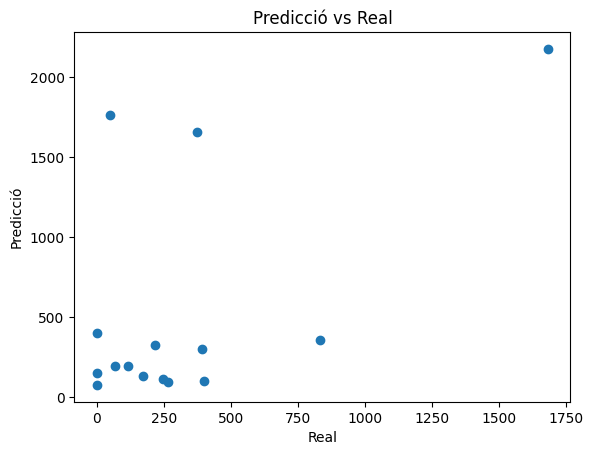

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = scaler.transform(X_test)
X_test_filtrat = pd.DataFrame(X_test, columns=df.drop(columns='temps_fins_reincidencia1a').columns)[coef_significatius.index]


y_test_pred = best_model.predict(X_test_filtrat)

# Calculem la mètrica MSE i R²
test_mse = mean_squared_error(y_test, y_test_pred)

print("\n--- AVALUACIÓ FINAL EN TEST ---")
print(f"MSE (Test): {test_mse:.4f}")


## plot de les prediccions
plt.scatter(y_test, y_test_pred)
plt.xlabel('Real')
plt.ylabel('Predicció')
plt.title('Predicció vs Real')
plt.show()

In [29]:
from sklearn.svm import SVR


param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [10, 100,1000],
    'epsilon': [ 1,10],
    # Per al kernel RBF, podries incloure 'svr__gamma'
    # 'svr__gamma': ['scale', 'auto', 0.01, 0.1, 1]
}
svr = SVR()

grid_search = GridSearchCV(
    svr,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1  # utilitza tots els nuclis disponibles per paral·lelitzar
)

grid_search.fit(X_train_filtrat, y_train)

# 6. RESULTATS DE LA CERCA
print("Millors paràmetres trobats:", grid_search.best_params_)
print("Millor puntuació (MSE negatiu) en CV:", grid_search.best_score_)
print(np.mean(grid_search.cv_results_['mean_test_score'] * -1))  # Multipliquem per -1 per obtenir el MSE positiu




Millors paràmetres trobats: {'C': 1000, 'epsilon': 10, 'kernel': 'linear'}
Millor puntuació (MSE negatiu) en CV: -246111.57843181104
382462.54287796933


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definim el grid de paràmetres
param_distributions = {
    'n_estimators': [20, 50, 100, 200, 300],
    'max_depth': [10, 20 , 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicialitzem el model
rf = RandomForestRegressor()

# Configurem RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_distributions,
    n_iter=50,  # Nombre de combinacions a provar
    cv=10,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1  # Utilitzar tots els nuclis disponibles
)

# Realitzem el Random Search
random_search.fit(X_train_filtrat, y_train)

# Resultats
print("Millor paràmetre:", random_search.best_params_)
print("Millor precisió (MSE):", -random_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(random_search.cv_results_['mean_test_score'] * -1)  # Multipliquem per -1 per obtenir el MSE positiu


Millor paràmetre: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Millor precisió (MSE): 72338.89980528023
Mitjana dels resultats de test per cada combinació:
[340028.92890208 184581.26944206  93790.24599796  92690.68798622
 151617.08997447 199005.88675907  87183.6726106  220733.20620561
 144724.23609969  88184.92328082 103059.5881456  211362.57438338
 221826.8600027  220746.86453894  81352.74528315  82010.05253821
  94972.65241017 103993.01137032  86245.87652162 334931.15074883
 149303.46902322 342176.48763071 137133.13069126 221827.93541416
 332733.06742554 341468.17249372 174133.95855     86572.2061334
  93153.62049461 143462.89769098  93150.71219591  72338.89980528
  91908.10595344  94667.75974754  97872.92489718 162309.09219618
 221830.38866879 221818.93046416 344091.63356562 139922.75666866
 330706.11188318 221828.41913604 108133.66183819 190060.4958129
 220733.20620561 221833.84051807 220725.03120561 140556.2582639
  9444

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definim el grid de paràmetres al voltant dels millors valors trobats
param_grid = {
    'n_estimators': [10, 20, 30],           # Al voltant de 20
    'max_depth': [5,10,15],              # Al voltant de 20
    'min_samples_split': [2, 3, 4],         # Al voltant de 2
    'bootstrap': [True]                     # Fixat perquè ja ha sortit el millor
}

# Inicialitzem el model
rf = RandomForestRegressor()

# Configurem GridSearchCV
grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True,
    n_jobs=-1  # Utilitza tots els nuclis disponibles
)

# Realitzem el Grid Search
grid_search.fit(X_train_filtrat, y_train)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió (MSE):", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(grid_search.cv_results_['mean_test_score'] * -1)  # Multipliquem per -1 per obtenir el MSE positiu


Millor paràmetre: {'bootstrap': True, 'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 10}
Millor precisió (MSE): 117737.16651435825
Mitjana dels resultats de test per cada combinació:
[133470.41761223 194588.07902651 141275.29047538 197604.98477932
 130313.14099985 163993.97853733 157837.28361116 160513.22799442
 143907.94835421 121417.7606059  186151.18524513 135494.90921323
 235307.19564674 235360.2826296  157720.26314131 200463.8066862
 150279.59943919 138979.64541721 253979.43183889 149392.43104722
 186884.61720617 117737.16651436 194145.59987351 142648.0904601
 213058.14808758 173060.63149144 185171.95582491]


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## fem grid search per trobar els millors hiperparàmetres

param_grid = {
    'n_estimators': [200,300,400,500],
    'max_depth': [30,40,50],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train, y_train)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(grid_search.cv_results_['mean_test_score'] * -1)  # Multipliquem per -1 per obtenir el MSE positiu


Millor paràmetre: {'max_depth': 40, 'n_estimators': 500}
Millor precisió: 146826.09472237332
Mitjana dels resultats de test per cada combinació:
[146840.16463917 152703.65822781 147061.02460987 156504.84584037
 156551.12816242 151265.88432822 151247.42829844 146826.09472237
 147381.40796967 149930.07237437 152774.63532631 146860.94674468]
